In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
boston = load_boston()
data = boston.data
target = boston.target

In [3]:
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [6]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [7]:
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [8]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))


Epoch 1/200

13/13 [==============================] - 1s 12ms/step - loss: 525.1796 - val_loss: 355.6224
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 282.1131 - val_loss: 130.2389
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 93.0218 - val_loss: 51.6127
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 47.4159 - val_loss: 32.5205
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 28.8418 - val_loss: 31.4607
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 25.0222 - val_loss: 25.6774
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 22.0363 - val_loss: 23.2396
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 20.1818 - val_loss: 21.5038
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 18.5089 - val_loss: 19.9998
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 16.9667 - v

In [9]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse:.2f}')

4/4 [==============================] - 0s 1ms/step
Mean Squared Error on Test Set: 11.86


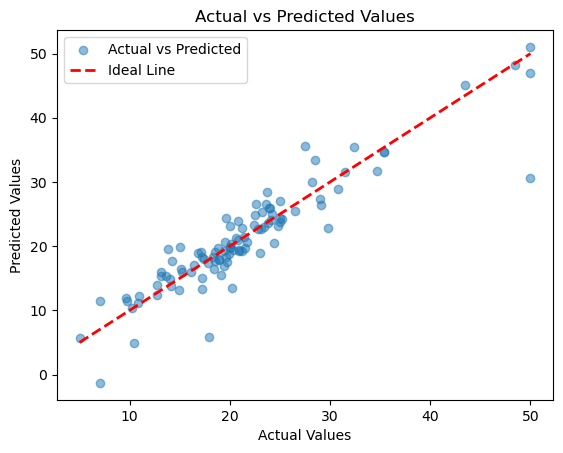

In [10]:
plt.scatter(y_test, predictions, label='Actual vs Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

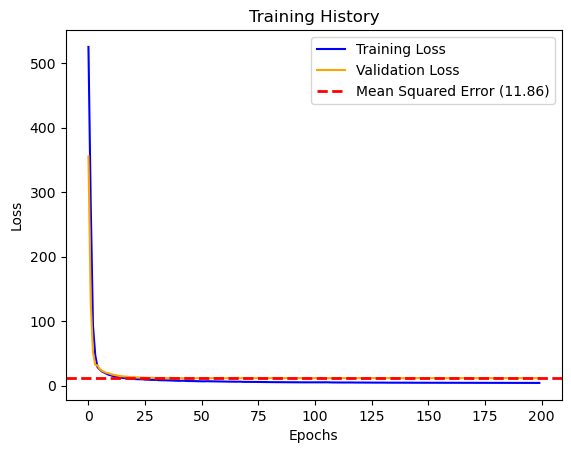

In [11]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.axhline(y=mse, color='red', linestyle='--', label=f'Mean Squared Error ({mse:.2f})', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [12]:
for i in range(8):
    print(f'Prediction: {predictions[i][0]:.3f}, Actual: {y_test[i]:.3f}')

Prediction: 26.494, Actual: 23.600
Prediction: 35.437, Actual: 32.400
Prediction: 15.357, Actual: 13.600
Prediction: 22.689, Actual: 22.800
Prediction: 16.031, Actual: 16.100
Prediction: 19.924, Actual: 20.000
Prediction: 17.306, Actual: 17.800
Prediction: 14.936, Actual: 14.000


In [13]:
from sklearn.metrics import r2_score


In [14]:
r2 = r2_score(y_test, predictions)
print(f'R-squared score on Test Set: {r2:.3f}')


R-squared score on Test Set: 0.838
